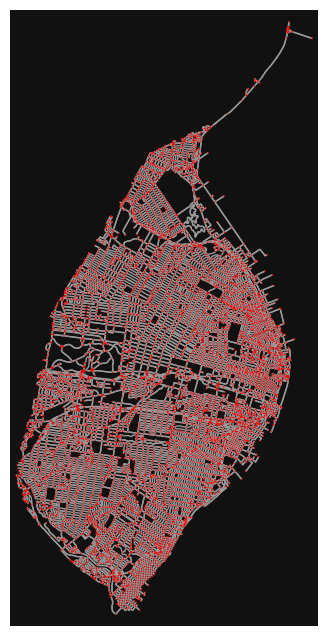

In [19]:
"""
Download data from openstreetmap for superblock analysis

Note: Max 10,000 queries per day and download < 5 GB
https://wiki.openstreetmap.org/wiki/Overpass_API#:~:text=https%3A%2F%2Flz4.overpass%2Dapi.de%2Fapi%2Finterpreter&text=Any%20of%20the%20three%20servers,about%201%2C000%2C000%20requests%20per%20day.z
"""
#import packages 
import os
import sys
path_superblocks = os.path.abspath(os.path.join(os.path.dirname("preprocessRJD"), '..'))
sys.path.append(path_superblocks)
import time
import geopandas as gpd
import networkx as nx
from shapely.geometry import Polygon, Point, LineString
import osmnx as ox
import cenpy
import folium 
import pandas 
from network import helper_network as hp_net
import matplotlib.pyplot as plt


### Get street data from osm and filter based upon paper### 
graph1=ox.graph.graph_from_place("St.Louis, MO, USA", network_type='drive', simplify=True, 
                                 retain_all=False, truncate_by_edge=False, which_result=None, buffer_dist=15, clean_periphery=True, custom_filter=None)
graph1.exclude_streets = ["primary", "secondary", "trunk"]
graph1.exclude_types = ['footway', 'private']
fig, ax = ox.plot_graph(graph1, node_color="r", node_zorder=3, node_size=1)
#nodes, edges = ox.graph_to_gdfs(graph1)

In [20]:
higher_level_nodes = [node for node, degree in dict(graph1.degree()).items() if degree >= 3]
lower_level_nodes = [node for node, degree in dict(graph1.degree()).items() if degree < 3]
node_2 = [node for node, degree in dict(graph1.degree()).items() if degree == 2]

In [21]:
graph1.remove_nodes_from(lower_level_nodes)
graph1.remove_nodes_from(node_2)

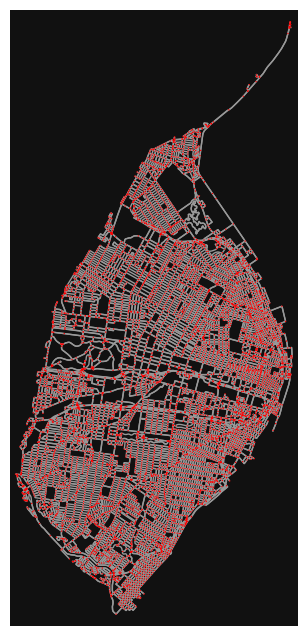

In [22]:
fig, ax = ox.plot_graph(graph1, node_color="r", node_zorder=3, node_size=1)

In [25]:
nx.find_cycle(graph1, source=None, orientation=None)

[(53168737, 53168736, 0), (53168736, 53168737, 0)]